In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
import random
from scipy.stats import beta
import pandas as pd
%matplotlib inline

## Objective Functions

In [51]:
# centers the opinion vector around 0
def mean_center(op, n1):
    ones = np.ones((n1, 1))
    x = abs(op - (np.dot(np.transpose(op),ones)/n1) * ones)
    return x

# compute number of edges, m
def num_edges(La, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and La[i,j] < 0:
                m += 1            
    return m


In [1]:
# Parameters for the network
n = 22   # number of nodes in the network
r = 1/11  # percent of info souce in the network
n1 = int(n*(1-r))



20


In [5]:
np.set_printoptions(precision=3)

## Generating Network
### 1. Make Innate opinion

In [6]:
##create two set of weights connected with density 1) inviduals  2) individual & informaton Source
c1 = np.sort(np.random.choice(n1, n1, replace=False)) #assume (1-r) are individuals
print('c1')
print(c1)
l1 = len(c1)

c1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [7]:
def make_innat_opinions(n, c1): #(n1, n2):
    
    # Make list of ind innate opinion to define info source opinion
    innat_s1 = np.random.uniform(low=0.4, high=0.6, size=int(n*(1-r)))    #individual's innate opinion 

    s1 = np.zeros((round((1-r)*n), 1))
    
    idx1 = 0
    for i in range(len(s1)):
        s1[i] = innat_s1[idx1]  #set innate opinion for ind.
        idx1 += 1

    print('s1')
    print(s1)

    # Make info souce opinion
#     h = np.random.uniform(low=max(s1), high=1.0, size=1)
#     g = np.random.uniform(low=0.0, high=min(s1), size=1)
    h = np.eye(1)
    g = np.zeros((1,1))

    s2 = np.concatenate((g, h),axis=0)
#     print('s2')
#     print(s2)

    # Make opinion list of both info source and agents   
    
    s = np.zeros((n, 1))
    idx1 = 0
    idx2 = 0

    for i in range(len(s)):
        if i in c1:
            s[i] = s1[idx1]
            idx1 += 1
        else:
            s[i] = s2[idx2]
            idx2 += 1    

#     print('s')
#     print(s)

  
    return (s1, h, g, s2, s)

In [8]:
(s1, g, h, s2, s) = make_innat_opinions(n, c1)
defult = s1
op = s1

s1
[[0.506]
 [0.417]
 [0.574]
 [0.545]
 [0.574]
 [0.462]
 [0.446]
 [0.582]
 [0.455]
 [0.555]
 [0.521]
 [0.474]
 [0.585]
 [0.542]
 [0.445]
 [0.492]
 [0.444]
 [0.467]
 [0.408]
 [0.507]]


In [56]:
#Test innate polarization

y = mean_center(s1,n1)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('innate_polarization')
print(innat_pol)

(z1,L) = equilibrium(n1,s1, g, h, G1, beta,gamma)    
op_mean = mean_center(s1, n1)
innat_dis = np.dot(np.dot(np.transpose(op_mean), L), np.transpose(op_mean))[0,0] 
print('innate disagreement')
print(innat_dis)

innate_polarization
0.06191552071011321
innate disagreement
0.002264533814158081


### 2. Make Confirmation Bias Adjacency Matrices

In [10]:
np.set_printoptions(precision=4)

In [11]:
### Prepare for create adjacent matrix
p1 = 0.5 # density within ind.
p2 = 0 # density of edges between Info Source and Indivisuals

pre_weights1 = scipy.sparse.random(1, int(0.5*l1*(l1 - 1)), density=p1).A[0] 
weights1 = pre_weights1/25

# pre_weights2 = scipy.sparse.random(1, int(l1*l2), density=p2).A[0]  
# weights2 = pre_weights2/10


print("weight1")
print(weights1)
weights1.shape
# print("weight2")
# print(weights2)

# b = weights2.round()  #generate a binary array to indicate the connection between ind. and inf. source 
                          #without consider the innate opinions, just based on the edges between info source and ind.


weight1
[0.0264 0.0353 0.0132 0.0032 0.     0.0377 0.0385 0.0022 0.     0.
 0.     0.     0.0382 0.0373 0.     0.0195 0.034  0.0009 0.     0.
 0.     0.0114 0.     0.     0.     0.     0.0397 0.0321 0.0165 0.
 0.0285 0.     0.     0.008  0.0174 0.     0.0015 0.0151 0.     0.0171
 0.0107 0.     0.0382 0.036  0.0273 0.     0.     0.     0.0068 0.
 0.0059 0.024  0.     0.     0.     0.0045 0.     0.     0.     0.
 0.0025 0.     0.     0.     0.     0.0326 0.0297 0.     0.0124 0.0274
 0.     0.     0.0165 0.0072 0.     0.     0.0284 0.0004 0.     0.
 0.0071 0.     0.     0.     0.0188 0.029  0.0358 0.     0.     0.
 0.     0.     0.     0.     0.0306 0.0245 0.     0.     0.     0.
 0.0376 0.     0.0273 0.0202 0.0107 0.0041 0.015  0.0008 0.0239 0.012
 0.0127 0.     0.     0.     0.     0.     0.     0.0104 0.0326 0.
 0.     0.0219 0.     0.0132 0.     0.0321 0.0316 0.0081 0.     0.
 0.     0.     0.0017 0.0354 0.034  0.006  0.004  0.0236 0.     0.
 0.     0.0325 0.     0.     0.     0.0155 

(190,)

In [12]:
np.set_printoptions(precision=3)

In [13]:
# create n x n adjacency matrix with existing init_G
G1 = np.zeros((n1, n1))
    
## Assign edges between ind to ind 
idx = 0
for i in c1:
    for j in c1:
            if i == j:
                G1[i][j] =0
                continue
            elif i < j:
                G1[i][j] = weights1[idx]
                idx += 1
#                 print(idx)
#                 print (G1[i][j])
            else:
                G1[i][j] = G1[j][i]
print("G for agents")
print(G1)


G for agents
[[0.    0.026 0.035 0.013 0.003 0.    0.038 0.039 0.002 0.    0.    0.
  0.    0.038 0.037 0.    0.019 0.034 0.001 0.   ]
 [0.026 0.    0.    0.    0.011 0.    0.    0.    0.    0.04  0.032 0.017
  0.    0.028 0.    0.    0.008 0.017 0.    0.002]
 [0.035 0.    0.    0.015 0.    0.017 0.011 0.    0.038 0.036 0.027 0.
  0.    0.    0.007 0.    0.006 0.024 0.    0.   ]
 [0.013 0.    0.015 0.    0.    0.004 0.    0.    0.    0.    0.002 0.
  0.    0.    0.    0.033 0.03  0.    0.012 0.027]
 [0.003 0.011 0.    0.    0.    0.    0.    0.017 0.007 0.    0.    0.028
  0.    0.    0.    0.007 0.    0.    0.    0.019]
 [0.    0.    0.017 0.004 0.    0.    0.029 0.036 0.    0.    0.    0.
  0.    0.    0.    0.031 0.024 0.    0.    0.   ]
 [0.038 0.    0.011 0.    0.    0.029 0.    0.    0.038 0.    0.027 0.02
  0.011 0.004 0.015 0.001 0.024 0.012 0.013 0.   ]
 [0.039 0.    0.    0.    0.017 0.036 0.    0.    0.    0.    0.    0.
  0.    0.01  0.033 0.    0.    0.022 0.    0.013]
 [0

In [14]:
## calculate Max row sum & column sum of agent' G --> result from beta gamma value

rowsum_ij = np.sum(G1,1)
max_rowsum_ij = max(rowsum_ij)
print(rowsum_ij)
print(max_rowsum_ij)
colsum_ij = np.sum(G1, axis=0)
max_colsum_ij = max(colsum_ij)
print(colsum_ij)
print(max_colsum_ij)

threshold = 1- max(max_rowsum_ij,max_colsum_ij)
print(threshold)
print("Beta reference value less than")
print(threshold/2)
print('Gamma reference value less than')
print(threshold/4)

[0.286 0.182 0.216 0.137 0.093 0.141 0.242 0.169 0.228 0.142 0.238 0.248
 0.169 0.177 0.202 0.198 0.2   0.238 0.091 0.23 ]
0.2863646179696519
[0.286 0.182 0.216 0.137 0.093 0.141 0.242 0.169 0.228 0.142 0.238 0.248
 0.169 0.177 0.202 0.198 0.2   0.238 0.091 0.23 ]
0.28636461796965196
0.713635382030348
Beta reference value less than
0.356817691015174
Gamma reference value less than
0.178408845507587


#### ---> here to update confirmation bias network

In [15]:
## assumptions: 1) beta > gamma >0    2) 1 - max{rowsum, colsum} >= max{2beta, 4gamma}

gamma = 0.09
beta = 0.30   # the average weight between agents
# check beta gamma are qualify or not
pipi = max(2*beta, 4*gamma)
# print(pipi)

ss = max(max_rowsum_ij, max_colsum_ij)
# print(ss)

xixi = pipi + ss
print("Should be less than 1:")
print (xixi)

Should be less than 1:
0.8863646179696519


In [16]:
## Test to see if Rowsum and column sum in final G is less than 0 
# rowsum = np.sum(G1,1)
# max_rowsum = max(rowsum)
# print(rowsum)
# print(max_rowsum)
# colsum = np.sum(G1, axis=0)
# max_colsum = max(colsum)
# print(colsum)
# print(max_colsum)

In [28]:
#     ##calculate equlibriua manually (Successful!!!)
def equilibrium(n1,opinion,g,h,G1,beta,gamma): 
    ## Cki are the determinate parameter indicate if info. source influence the agent or not
    c1i = [1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
    c2i = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    C1 = np.diag(c1i, k=0)
    C2 = np.diag(c2i, k=0)
    # print(s1)
    R1 = C1*opinion
    R2 = C2*opinion
    I = np.eye(n1)
    Ematrix = I - G1 + gamma*(R2 - R1 + h*C1 - g*C2)
    Ematrix_inverse = np.linalg.inv(Ematrix)
    rowsum = np.sum(G1,1)
    rowsumm_atrix = np.zeros((n1, n1))
    for i in range(n1):
        rowsumm_atrix[i,i] = rowsum[i]
    addMatrix = I - rowsumm_atrix - (C1+C2)*beta + (C1*h + C2*g)*gamma
    A = np.matmul(Ematrix_inverse,addMatrix)
    Vector_A = (c1i*h + c2i*g)*beta + (c2i*g**2-c1i*h**2)*gamma
    # print(np.shape(Vector_A))
    trans_Vector_A = Vector_A.transpose()
    # print(np.shape(trans_Vector_A))
    L = np.matmul(Ematrix_inverse, trans_Vector_A)
    # print(L)
    z1 = np.matmul(A,s1) + L
    
#     print("equilibrium opinion")
#     print(z1)
    return (z1,L)

In [45]:
# # maximizing polarization only: \bar{z}^T \bar{z}   
def obj_polarization(G1, s1, s2, n1):
    np.set_printoptions(precision=5)
    (z1,L) = equilibrium(n1,s1, g, h, G1, beta,gamma)
#     z = np.concatenate((z1,s2))
    op_mean = mean_center(z1, n1)
    return np.dot(np.transpose(op_mean), op_mean)[0,0] 

# maximizing disagreement only: \bar{z}^T L \bar{z}
def obj_disagreement(G1, s1, s2, n1):
    np.set_printoptions(precision=5)
    (z1,L) = equilibrium(n1,s1, g, h, G1, beta,gamma)    
    op_mean = mean_center(z1, n1)
    ans = np.dot(np.dot(np.transpose(op_mean), L), np.transpose(op_mean))[0,0]  
    return ans

In [63]:
equi_polarization = obj_polarization(G1, s1, s2, n1)
print("Equilibrium Polarization")
print(equi_polarization)

if equi_polarization > innat_pol:
    print("Equilibrium Polarization > Innate Polarization"+ str(innat_pol))
else:
    print("Innate Polarization > Equilibrium Polarization")
    
equi_disagreement = obj_disagreement(G1, s1, s2, n1)
print("Equilibrium Disagreement")
print(equi_disagreement)

if equi_disagreement > innat_dis:
    print("Equilibrium Disagreement > Innate Disagreement" + str(innat_dis))
else:
    print("Innate Disagreement > Equilibrium Disagreement" + str(innat_dis))


Equilibrium Polarization
0.5420610536889723
Equilibrium Polarization > Innate Polarization0.06191552071011321
Equilibrium Disagreement
0.2054098402900832
Equilibrium Disagreement > Innate Disagreement0.002264533814158081


In [48]:
np.set_printoptions(precision=4)

In [49]:
#Test obj_innate_polarization function 
#No Op Change Equilibriua of Stand
z1  = equilibrium(n1, s1, g,h,G1,beta,gamma)
print('check: Equilibrium op should NOT have any negative value')
print(z1)

y = mean_center(s1,n1)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('innate_polarization')
print(innat_pol)
# Test equilibrium polarization
z_mean = mean_center(z1,n1)
equ_pol = np.dot(np.transpose(z_mean), z_mean)[0,0]
print('equilibrium polarization')
print(equ_pol)

di = innat_pol - equ_pol
print("difference")
print(di)
print(z1-s1)

check: Equilibrium op should NOT have any negative value
[[0.3739]
 [0.3835]
 [0.3863]
 [0.4035]
 [0.4344]
 [0.8164]
 [0.8046]
 [0.82  ]
 [0.7997]
 [0.8286]
 [0.7209]
 [0.7078]
 [0.7314]
 [0.7698]
 [0.7231]
 [0.7045]
 [0.7474]
 [0.727 ]
 [0.7529]
 [0.7516]]
innate_polarization
0.062370531101899114
equilibrium polarization
0.5252735689134631
difference
-0.462903037811564
[[-0.0834]
 [-0.0478]
 [-0.1234]
 [-0.1212]
 [-0.123 ]
 [ 0.3766]
 [ 0.3718]
 [ 0.4003]
 [ 0.3857]
 [ 0.3829]
 [ 0.3043]
 [ 0.2645]
 [ 0.2428]
 [ 0.1742]
 [ 0.2362]
 [ 0.2693]
 [ 0.205 ]
 [ 0.1914]
 [ 0.2107]
 [ 0.1927]]


#### Perfect Network Generation Above
_________________________________________________________________________________________________________________


In [50]:
# ## Find bigger porlarization than innate porlarization
# #gamma = 0.04
# #list = (0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04)#, 0.045, 0.05, 0.055, 0.06)
# list = (0, 0.05, 0.1, 0.149)
# beta = 0.29  # the average weight between agents

In [51]:
# # create n x n adjacency matrix with existing init_G
# G1 = np.zeros((n1, n1))
    
# ## Assign edges between ind to ind 

# ## Assign weights between info and ind

# t = 0

# for gamma in list:
#     print(gamma)
#     t = t +1
# #     print(t)   
#     idx = 0
#     for i in c1:
#         for j in c1:
#                 if i == j:
#                     G1[i][j] =0
#                     continue
#                 elif i < j:
#                     G1[i][j] = weights1[idx]
#                     idx += 1
#     #                 print(idx)
#     #                 print (G1[i][j])
#                 else:
#                     G1[i][j] = G1[j][i]
                
#     z  = equilibrium(n1, s1, g,h,G1,beta,gamma)
# #     print(z)
#     # Test equilibrium polarization
#     z_mean = mean_center(z,n)
#     equ_pol = np.dot(np.transpose(z_mean), z_mean)[0,0]
#     print('equilibrium polarization')
#     print(equ_pol)
    



### 3. Network Visualization

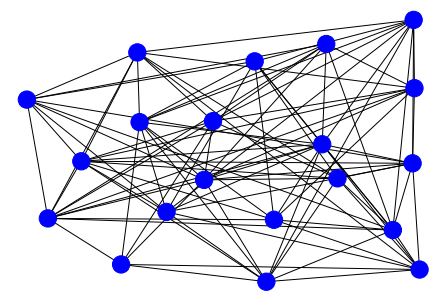

<Figure size 1800x1800 with 0 Axes>

In [52]:
La = scipy.sparse.csgraph.laplacian(G1, normed=False)

nxG = nx.from_numpy_matrix(G1)

color_map = []
for node in nxG:
    if node in c1:
        color_map.append('Blue')
    else: 
        color_map.append('Red')  

#nxG1 = nx.DiGraph(G)
nx.draw(nxG, node_color=color_map, with_labels=False)
plt.figure(figsize=(25, 25))
plt.show()

### Calculate Polarization based on Compatitive Paper
$$P(z) = z ^T * z $$


Innate greedy algorithm (polarization):

For each $i$ from $1$ to $k$, we choose $v_i$ such that:

$$v_i = argmax_{v \in V - \hat{s}} \max \left(\bar{s}_1^T \bar{s}_1, \bar{s}_0^T \bar{s}_0 \right) $$

In [53]:
print(op)

[[0.4573]
 [0.4314]
 [0.5098]
 [0.5247]
 [0.5573]
 [0.4398]
 [0.4328]
 [0.4196]
 [0.414 ]
 [0.4458]
 [0.4166]
 [0.4433]
 [0.4886]
 [0.5955]
 [0.4868]
 [0.4352]
 [0.5424]
 [0.5356]
 [0.5421]
 [0.5589]]


## Maximize - change opinion to 1 or 0

###     Maximize Equilibrium

In [54]:
# Calculate innate polarization
def obj_innate_polarization(op, n):  
    np.set_printoptions(precision=5)
    op_mean = mean_center(op, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]



In [56]:
innate_porlarization = obj_innate_polarization(op, n1)
print('innate_polarization')
print(innate_porlarization)
innat_equi_por = obj_polarization(G1, s1, s2, n1)
print('equilibrium polarization')
print(innat_equi_por)

innate_polarization
0.062370531101899114
equilibrium polarization
0.5252735689134631


In [62]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def maximize_equi_polarization(op, n1, v):

    innat_equi_por = obj_polarization(G1, op, s2, n1)
    temp = op[v, 0]
    por_arr = np.zeros(11)
#     print(por_arr)
    
    max_opi_option = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    # objective if set opinion to 0, 0.1, ..., 1.0
    i = 0
    for new_op in max_opi_option:
        op[v, 0] = new_op
        por_arr[i] = obj_polarization(G1, op, s2, n1)
        i = i + 1
        op[v, 0] = temp
    
#     z = equilibrium(n1,s1,g,h,G1,beta,gamma)
    
    
    maxmize_op = np.argmax(por_arr)/10
    max_por = np.max(por_arr)
        
#     print(maxmize_op, innat_equi_por, max_por)

    return (maxmize_op, innat_equi_por, max_por)

In [63]:
(new_op, innat_equi_por, max_por) =  maximize_equi_polarization(op, n1, v)

In [64]:
def choose_max_vertex(op, n1):
    # iterate over all the vertices that have not yet been changed
    vertices = np.where((op != 0.0) & (op != 1.0))
    # current best vertex, its opinion {0, 1}, "innate" objective, and objective
    
    innat_equi_por = obj_polarization(G1, op, s2, n1)
    
    champion = (None, None, 0, innat_equi_por)

#     obj_type == POLARIZATION:
    for v in vertices[0]:
        (changed_opinion, innate_obj, obj) = maximize_equi_polarization(op, n1, v)
        
        if obj > champion[3]:
            champion = (v, changed_opinion, innate_obj, obj)

    return (champion)


## Minimize - change opinion to 0.5

In [66]:
print(s1)
print(op)

[[0.45731]
 [0.43136]
 [0.50976]
 [0.5247 ]
 [0.55733]
 [0.43984]
 [0.43278]
 [0.41964]
 [0.41396]
 [0.44575]
 [0.41655]
 [0.44332]
 [0.4886 ]
 [0.59551]
 [0.48684]
 [0.43522]
 [0.54243]
 [0.5356 ]
 [0.54214]
 [0.55886]]
[[0.45731]
 [0.43136]
 [0.50976]
 [0.5247 ]
 [0.55733]
 [0.43984]
 [0.43278]
 [0.41964]
 [0.41396]
 [0.44575]
 [0.41655]
 [0.44332]
 [0.4886 ]
 [0.59551]
 [0.48684]
 [0.43522]
 [0.54243]
 [0.5356 ]
 [0.54214]
 [0.55886]]


In [72]:
# determines if a given vertex should be set to zero or one, all else equal
def minimize_opinion(op, s2, n1, v):

    # save original value of innate opinion
    temp = op[v,0]
    # minimizer's options
    min_opi_option = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    obj = np.zeros(11)

    # objective if set opinion to 0, 0.1, ..., 1.0
    i = 0
    for new_op in min_opi_option:
        op[v, 0] = new_op
        obj[i] = obj_polarization(G1, op, s2, n1)
        
        i = i + 1
        # restore original opinion
        op[v, 0] = temp
        

    minimize_op = np.argmin(obj)/10
    min_obj = np.min(obj)
    
#     print(minimize_op, innat_equi_por, min_obj)
    
    # pick the opinion value that yields bigger objective function value
    return (minimize_op, innat_equi_por, np.min(obj))

In [75]:
def choose_min_vertex(op, n1):
    # iterate over all the vertices that have not yet been changed
    vertices = np.where((op != 0.0) & (op != 1.0) & (op != 0.5))
    # current best vertex, its opinion {0, 1}, "innate" objective, and  current best objective

    innat_equi_por = obj_polarization(G1, op, s2, n1)
    
    champion = (None, None, 0, innat_equi_por)

    for v in vertices[0]:
        (minimize_op, innate_obj, obj) = minimize_opinion(op, s2, n1, v)
        
        if obj < champion[3]:
            champion = (v, minimize_op, innate_obj, obj)

    return (champion)

In [65]:
#print('champion_max_equilibrium_por')
max_champion = choose_max_vertex(op, n1)
print('v', 'changed_opinion', 'innate_obj', 'obj')
print(max_champion)

(v, changed_opinion, innate_obj, obj) = max_champion
print('innate_op of the selected vertex')
print(op[v, 0])



v changed_opinion innate_obj obj
(3, 0.0, 0.5252735689134631, 0.7873401222618035)
innate_op of the selected vertex
0.5246958840558633


In [76]:
min_champion =  choose_min_vertex(op, n1)
print('v', 'changed_opinion', 'innate_obj', 'min_pol')
(v, changed_opinion, innate_obj, obj) = min_champion
print (min_champion)
print('innate_op of the selected vertex')
print(s[v, 0])

v changed_opinion innate_obj min_pol
(0, 1.0, 0.5252735689134631, 0.42591348475386687)
innate_op of the selected vertex
0.457306006212411


In [77]:
print("min innate opinion")
print(s[4,0])

print("max innate opinion")
print(s[1,0])

min innate opinion
0.5573256623921952
max innate opinion
0.4313575743275893


# Equilibrium

In [78]:
print(s1)

[[0.45731]
 [0.43136]
 [0.50976]
 [0.5247 ]
 [0.55733]
 [0.43984]
 [0.43278]
 [0.41964]
 [0.41396]
 [0.44575]
 [0.41655]
 [0.44332]
 [0.4886 ]
 [0.59551]
 [0.48684]
 [0.43522]
 [0.54243]
 [0.5356 ]
 [0.54214]
 [0.55886]]


In [85]:
def minimizer_play(max_input, n1):

#     print("__________")
#     print('1st round minimizer')
    # pass the maxmixer's equilibirum opinion to minimizer
    min_champion =  choose_min_vertex(max_input, n1)
    (v, changed_opinion, innate_obj, obj) = min_champion
#     print('v', 'changed_opinion', 'innate_obj', 'min_pol')
#     print (min_champion)  #Minimizer tell which opinion to change

    max_input[v,0] = min_champion[1] # update the opinion with minimizer's choice
#     print(max_input)

    # Get new equilibrium after minimizer's operation
    por = obj_polarization(G1, max_input, s2, n1) # Polarization
    
    equi_opi_min = equilibrium(n1,max_input,g,h,G1,beta,gamma) 
    min_input  = equi_opi_min     #pass minimizer's equilibrium to next player
#     print(equi_opi_min)

    return (min_input, por)

def maximizer_play(min_input,n1):

    #Take the equilibrium opinion after minimizer's operation

    # Maxmizer start looking for agent to change opinion
    max_champion = choose_max_vertex(min_input, n1) 
    (v, changed_opinion, innate_obj, obj) = max_champion
#     print('v', 'changed_opinion', 'innate_obj', 'max_pol')
#     print(max_champion)

    # update the opinion with maximizer's choice
    min_input[v,0] = max_champion[1]
#     print(min_input)

    # get new equi. after maxmizer's operation
    por = obj_polarization(G1, min_input, s2, n1) # polarization
    
    equi_opi_max = equilibrium(n1,min_input,g,h,G1,beta,gamma) 
    max_input = equi_opi_max    #pass maxmizer's equilibrium to next player
    
#     print(equi_opi_max)
    return (max_input, por)

In [86]:
# Game start from maximizer
op[v,0] = max_champion[1]
print(max_champion)  #Maximizer tell which opinion to change
print(op)            #The opinion after Maximizer's operation
#     [v,0] = max_champion[1]
equi_opi_max = equilibrium(n1,op,g,h,G1,beta,gamma) #Take the equilibrium opinion after maxmizer's operation
max_input = equi_opi_max 
print(max_input)

(3, 0.0, 0.5252735689134631, 0.7873401222618035)
[[0.     ]
 [0.43136]
 [0.50976]
 [0.5247 ]
 [0.55733]
 [0.43984]
 [0.43278]
 [0.41964]
 [0.41396]
 [0.44575]
 [0.41655]
 [0.44332]
 [0.4886 ]
 [0.59551]
 [0.48684]
 [0.43522]
 [0.54243]
 [0.5356 ]
 [0.54214]
 [0.55886]]
[[0.14048]
 [0.37351]
 [0.37807]
 [0.40301]
 [0.4328 ]
 [0.81592]
 [0.80402]
 [0.81936]
 [0.79879]
 [0.82368]
 [0.71981]
 [0.70707]
 [0.73048]
 [0.76904]
 [0.7168 ]
 [0.69585]
 [0.74438]
 [0.71618]
 [0.7439 ]
 [0.75022]]


# Game Start!

In [87]:
Flag = 0
equi_min = 1
equi_max = 0
max_in = 0
(min_in, equi_opi_min) = minimizer_play(max_input, n1)
count = 0

while Flag == 0: 
    a = round(equi_min,4)
    b = round(equi_max,4)
    if a == b:
        print("Reached Nash Equilibrium at game"+ str(count+1) + "and Equi_Por = " + str(equi_min))
        Flag = 1
        break
    
    (max_input, equi_max)= maximizer_play(min_in,n1)
    max_in = max_input
    
    
    (min_input, equi_min) = minimizer_play(max_in, n1)
    min_in = min_input
    
    count = count + 1
    print("Game " + str(count))
    print("Not Reached Nash Equilibrium at Equi_Min = " + str(equi_min) + " and Equi_Max = "+ str(equi_max)) 
    


Game 1
Not Reached Nash Equilibrium at Equi_Min = 0.6694764944537112 and Equi_Max = 0.706859545808448
Game 2
Not Reached Nash Equilibrium at Equi_Min = 0.6694887931123928 and Equi_Max = 0.7067127315466788
Game 3
Not Reached Nash Equilibrium at Equi_Min = 0.6694888591334611 and Equi_Max = 0.7067118795600689
Game 4
Not Reached Nash Equilibrium at Equi_Min = 0.6694888594947453 and Equi_Max = 0.7067118748036143
Game 5
Not Reached Nash Equilibrium at Equi_Min = 0.6694888594967345 and Equi_Max = 0.7067118747772921
Game 6
Not Reached Nash Equilibrium at Equi_Min = 0.6694888594967457 and Equi_Max = 0.7067118747771469
Game 7
Not Reached Nash Equilibrium at Equi_Min = 0.6694888594967459 and Equi_Max = 0.706711874777146
Game 8
Not Reached Nash Equilibrium at Equi_Min = 0.6694888594967459 and Equi_Max = 0.706711874777146
Game 9
Not Reached Nash Equilibrium at Equi_Min = 0.6694888594967459 and Equi_Max = 0.706711874777146
Game 10
Not Reached Nash Equilibrium at Equi_Min = 0.6694888594967459 and Equ

KeyboardInterrupt: 